In [1]:
using Plots
using LinearAlgebra
using Random
using Luxor
using Dates # for debug only

In [2]:
function IAV_organization(viral_length, binding_radius)                                                 
    # ==============================================================================================================
    # IAV_organization(viral_length,binding_radius): specifies the x-y coordinates of HA and NA on the surface of an 
    # IAV viral particle.
    #     viral_length: length of the virus's main axis [m]
    #     binding_radius: distance between adjacent molecules [m]
    # Returns a set of HA coordinates, NA coordinates, and the corners of a rectangle which defines the maximum 
    # bounding rectangle of the IAV particle.
    # ==========================================================================
    
    # Calculating vertical heights
    height = sqrt(3) * binding_radius / 2
    height_twice = sqrt(3) * binding_radius

    height_max = viral_length / 2
    height_min = -viral_length / 2

    # Calculating y coordinates
    y0 = collect(height_min:height_twice:height_max)
    y1 = collect(height_min:height_twice:(height_max + height_twice))
    y2 = collect((height_min - height_twice):height_twice:(height_max + height_twice))

    # Calculating x coordinates
    x0 = zeros(length(y0))
    x1 = zeros(length(y1))
    x2 = zeros(length(y2))

    # Concatenating coordinates
    y_cord = vcat(y0, y1 .- height, y2, y1 .- height, y2, y1 .- height, y2, y1 .- height, y0)
    x_cord = vcat(x0 .- 2*binding_radius, x1 .- 3*binding_radius/2, x2 .- binding_radius, x1 .- binding_radius/2, x2, x1 .+ binding_radius/2, x2 .+ binding_radius, x1 .+ 3*binding_radius/2, x0 .+ 2*binding_radius)

    # Calculating corners of the bounding rectangle
    IAV_binding_rectangle_corners = [minimum(x_cord)-binding_radius maximum(y_cord)+binding_radius;
               maximum(x_cord)+binding_radius maximum(y_cord)+binding_radius;
               maximum(x_cord)+binding_radius minimum(y_cord)-binding_radius;
               minimum(x_cord)-binding_radius minimum(y_cord)-binding_radius]

    # Separating HA and NA positions
    i = findall(y_cord .< -2 * viral_length / 5)
    j = findall(y_cord .>= -2 * viral_length / 5)

    # Filter out NA and HA
    HA_coordinates = [x_cord[j] y_cord[j]]
    NA_coordinates = [x_cord[i] y_cord[i]]

    return HA_coordinates, NA_coordinates, IAV_binding_rectangle_corners
end

IAV_organization (generic function with 1 method)

In [3]:
function plotIAV()
    p = plot(IAV_binding_rectangle_corners_plot[:, 1], IAV_binding_rectangle_corners_plot[:, 2], marker=(:dot, 4), label="corners", grid=true, aspect_ratio=:equal, legend=true)
    scatter!(HA_coordinates[:, 1], HA_coordinates[:, 2], markersize=4, color="blue", label="HA")
    scatter!(NA_coordinates[:, 1], NA_coordinates[:, 2], markersize=4, color="red", label="NA")
    
    xlabel!("X-axis")
    ylabel!("Y-axis")
    title!("Plot of IAV organizations")
    display(plot!(p))
end

function plotIAV_SA_Bond()
    particles_free, particles_HA, particles_NA = FilterParticlesbyBindingLigand(Particles_coordinates)
    CleavedSA_coordinates, CarpetSA_coordinates, FloatingAntibody_coordinates = FilterParticlesbyNature(particles_free)
    CarpetSA_coordinates_inRect, CarpetSA_coordinates_outRect = FilterParticlesbyRect(CarpetSA_coordinates, IAV_binding_rectangle_corners)
    FloatingAntibody_coordinates_inRect, FloatingAntibody_coordinates_outRect = FilterParticlesbyRect(FloatingAntibody_coordinates, IAV_binding_rectangle_corners)
    
    _, CarpetSA_HA, FloatingAntibody_HA = FilterParticlesbyNature(particles_HA)
    _, CarpetSA_NA, FloatingAntibody_NA = FilterParticlesbyNature(particles_NA)
    
    p = plot(Boundary_rectangle_corners_plot[:, 1], Boundary_rectangle_corners_plot[:, 2], marker=(:dot, 4), color="black", label="Boundary", grid=true, aspect_ratio=:equal, legend=true, loc="right", horiz=true)
    plot!(IAV_binding_rectangle_corners_plot[:, 1], IAV_binding_rectangle_corners_plot[:, 2], marker=(:dot, 4), color="black", label="BindingRadius")
    scatter!(HA_coordinates[:, 1], HA_coordinates[:, 2], markersize=6, color="lightblue", markerstrokewidth=0.5, label="HA")
    scatter!(NA_coordinates[:, 1], NA_coordinates[:, 2], markersize=6, color="lightgreen", markerstrokewidth=0.5, label="NA")
    # Plot disabled ligand
    scatter!(FloatingAntibody_HA[:, 5], FloatingAntibody_HA[:, 6], markersize=6, color="red", markerstrokewidth=0.5, label="Disabled HA")
    scatter!(FloatingAntibody_NA[:, 5], FloatingAntibody_NA[:, 6], markersize=6, color="red", markerstrokewidth=0.5, label="Disabled NA")
    
    scatter!(CleavedSA_coordinates[:, 2], CleavedSA_coordinates[:, 3], markersize=3, color="red", markerstrokecolor="red", label="CleavedSA")
    scatter!(CarpetSA_coordinates_outRect[:, 2], CarpetSA_coordinates_outRect[:, 3], markersize=4, color="orange", markerstrokecolor="orange", label="CarpetSA_outRect")
    scatter!(CarpetSA_coordinates_inRect[:, 2], CarpetSA_coordinates_inRect[:, 3], markersize=4, color="orange", markerstrokewidth=0.2, label="CarpetSA_inRect")
    scatter!(FloatingAntibody_coordinates_outRect[:, 2], FloatingAntibody_coordinates_outRect[:, 3], markersize=4, color="brown", markerstrokecolor="brown", label="FloatingAntibody_outRect")
    scatter!(FloatingAntibody_coordinates_inRect[:, 2], FloatingAntibody_coordinates_inRect[:, 3], markersize=4, color="brown", markerstrokewidth=0.2, label="FloatingAntibody_inRect")
    scatter!(CarpetSA_HA[:, 2], CarpetSA_HA[:, 3], markersize=4, color="orange", markerstrokewidth=0.2, shape=:utriangle, label="")
    scatter!(CarpetSA_NA[:, 2], CarpetSA_NA[:, 3], markersize=4, color="orange", markerstrokewidth=0.2, shape=:utriangle, label="")
    scatter!(FloatingAntibody_HA[:, 2], FloatingAntibody_HA[:, 3], markersize=4, color="brown", markerstrokewidth=0.2, shape=:utriangle, label="")
    scatter!(FloatingAntibody_NA[:, 2], FloatingAntibody_NA[:, 3], markersize=4, color="brown", markerstrokewidth=0.2, shape=:utriangle, label="")

    if !isempty(CarpetSA_HA)
        # plot!([(CarpetSA_HA[1, 2], CarpetSA_HA[1, 3]), (CarpetSA_HA[1, 5], CarpetSA_HA[1, 6])], line=(:yellow, 2), label="CarpetSA_HA Bond")
        for pair in eachrow(CarpetSA_HA)
            plot!([(pair[2], pair[3]), (pair[5], pair[6])], line=(:yellow, 2), label="")
        end
    end# cyan, lightgreen

    if !isempty(FloatingAntibody_HA)
        # plot!([(FloatingAntibody_HA[1, 2], FloatingAntibody_HA[1, 3]), (FloatingAntibody_HA[1, 5], FloatingAntibody_HA[1, 6])], line=(:yellow, 2), label="FloatingAntibody_HA Bond")
        for pair in eachrow(FloatingAntibody_HA)
            plot!([(pair[2], pair[3]), (pair[5], pair[6])], line=(:yellow, 2), label="")
        end
    end
    
    if !isempty(CarpetSA_NA)
        # plot!([(CarpetSA_HA[1, 2], CarpetSA_HA[1, 3]), (CarpetSA_HA[1, 5], CarpetSA_HA[1, 6])], line=(:yellow, 2), label="CarpetSA_HA Bond")
        for pair in eachrow(CarpetSA_NA)
            plot!([(pair[2], pair[3]), (pair[5], pair[6])], line=(:yellow, 2), label="")
        end
    end# cyan, lightgreen

    if !isempty(FloatingAntibody_NA)
        # plot!([(FloatingAntibody_HA[1, 2], FloatingAntibody_HA[1, 3]), (FloatingAntibody_HA[1, 5], FloatingAntibody_HA[1, 6])], line=(:yellow, 2), label="FloatingAntibody_HA Bond")
        for pair in eachrow(FloatingAntibody_NA)
            plot!([(pair[2], pair[3]), (pair[5], pair[6])], line=(:yellow, 2), label="")
        end
    end
    
    xlabel!("X-axis")
    ylabel!("Y-axis")
    title!("Plot of IAV inside SA with bond")
    plot!(size=(1920,1080))
    # display(p)
    return p
end

plotIAV_SA_Bond (generic function with 1 method)

In [4]:
function Shuffle(coordinates::Matrix{Any})
    row_indices = 1:size(coordinates, 1)
    shuffled_indices = Random.shuffle(row_indices)
    coordinates = coordinates[shuffled_indices, :]
    return coordinates
end

function FilterParticlesbyNature(coordinates::Matrix{Any})
    CleavedSA_coordinates = coordinates[coordinates[:, 1] .== CleavedSA, :]
    CarpetSA_coordinates = coordinates[coordinates[:, 1] .== CarpetSA, :]
    FloatingAntibody_coordinates = coordinates[coordinates[:, 1] .== FloatingAntibody, :]
    return CleavedSA_coordinates, CarpetSA_coordinates, FloatingAntibody_coordinates
end

function FilterParticlesbyRect(coordinates::Matrix{Any}, rectangle_corners::Matrix{Float64})
    polygon = Luxor.Point.(rectangle_corners[:, 1], rectangle_corners[:, 2])
    points = Luxor.Point.(coordinates[:, 2], coordinates[:, 3])
    inside = [isinside(p, polygon; allowonedge=true) for p in points]
    Particles_coordinates_inRect = coordinates[inside, :]
    Particles_coordinates_outRect = coordinates[.!inside, :]
    return Particles_coordinates_inRect, Particles_coordinates_outRect
end


function FilterParticlesbyBindingLigand(coordinates::Matrix{Any})
    Particles_Free = coordinates[coordinates[:, 4] .== Null, :]
    Particles_HA = coordinates[coordinates[:, 4] .== HA, :]
    Particles_NA = coordinates[coordinates[:, 4] .== NA, :]
    return Particles_Free, Particles_HA, Particles_NA
end

function BindingPickedParticles(Ligand, coordinates::Matrix{Any}, Type)
    _, CarpetSAs, FloatingAntibodies = FilterParticlesbyNature(coordinates)

    if size(FloatingAntibodies, 1) == 0
        Particles_Free_inRect_inRadius_bind = coordinates
        Particles_Free_inRect_inRadius_bind
        Particles_Free_inRect_inRadius_bind[:, 4:6] .= [Type Ligand[1] Ligand[2]]
        Particles_Free_inRect_inRadius_bind
                                
        Ligand[3] = Ligand[3] + size(Particles_Free_inRect_inRadius_bind,1)
    else
        particles_free_inRect_inRadius_bind_antibody_index = randperm(size(FloatingAntibodies, 1))[1:1]
        particles_free_inRect_inRadius_bind_antibody = FloatingAntibodies[particles_free_inRect_inRadius_bind_antibody_index, :]
        particles_free_inRect_inRadius_not_bind_antibody_index = setdiff(1:size(FloatingAntibodies, 1), particles_free_inRect_inRadius_bind_antibody_index)
        particles_free_inRect_inRadius_not_bind_antibody = FloatingAntibodies[particles_free_inRect_inRadius_not_bind_antibody_index, :]
        
        particles_free_inRect_inRadius_bind_antibody                    
        particles_free_inRect_inRadius_bind_antibody[:, 4:6] .= [Type Ligand[1] Ligand[2]]
        particles_free_inRect_inRadius_bind_antibody
     
        Ligand[3] = 0
        Ligand[4] = Blocked
                                
        Particles_Free_inRect_inRadius_bind = vcat(CarpetSAs, particles_free_inRect_inRadius_not_bind_antibody, particles_free_inRect_inRadius_bind_antibody)
    end
    return Particles_Free_inRect_inRadius_bind
end

function BindingGroup(Ligands_coordinates::Matrix{Any}, coordinates::Matrix{Any}, max_bond::Int, Type)
    # Generate a new Particles_Free_inRect
    for Ligand in eachrow(Ligands_coordinates)
        # @show Ligand
        if Ligand[4] != Blocked
            n = Int(max_bond - Ligand[3])
            if n > 0
                # Computing distance and filtering out particles within the binding radius of the ligand
                Particles_Free_inRect_inRadius_index = (sqrt.((coordinates[:, 2] .- Ligand[1]).^2 .+ (coordinates[:, 3] .- Ligand[2]).^2)) .<= r
                Particles_Free_inRect_inRadius = coordinates[Particles_Free_inRect_inRadius_index, :]
                Particles_Free_inRect_outRadius = coordinates[.!Particles_Free_inRect_inRadius_index, :]

                if size(Particles_Free_inRect_inRadius, 1) != 0
                    # Picking possible binding particles by pon
                    Particles_Free_inRect_inRadius_possible_bind_index = rand(size(Particles_Free_inRect_inRadius, 1)) .< pon
                    Particles_Free_inRect_inRadius_possible_bind = Particles_Free_inRect_inRadius[Particles_Free_inRect_inRadius_possible_bind_index, :]
                    Particles_Free_inRect_inRadius_not_bind = Particles_Free_inRect_inRadius[.!Particles_Free_inRect_inRadius_possible_bind_index, :]

                    if size(Particles_Free_inRect_inRadius_possible_bind, 1) != 0
                        # If too many candidate
                        if size(Particles_Free_inRect_inRadius_possible_bind, 1) > n
                            # Picking max n SA for bind
                            Particles_Free_inRect_inRadius_pick_bind_index = randperm(size(Particles_Free_inRect_inRadius_possible_bind, 1))[1:n]
                            Particles_Free_inRect_inRadius_pick_bind = Particles_Free_inRect_inRadius_possible_bind[Particles_Free_inRect_inRadius_pick_bind_index, :]
                            Particles_Free_inRect_inRadius_not_pick_bind_index = setdiff(1:size(Particles_Free_inRect_inRadius_possible_bind, 1), Particles_Free_inRect_inRadius_pick_bind_index)
                            Particles_Free_inRect_inRadius_not_pick_bind = Particles_Free_inRect_inRadius_possible_bind[Particles_Free_inRect_inRadius_not_pick_bind_index, :]

                            Particles_Free_inRect_inRadius_bind = BindingPickedParticles(Ligand, Particles_Free_inRect_inRadius_pick_bind, Type)
                            coordinates = vcat(Particles_Free_inRect_outRadius, Particles_Free_inRect_inRadius_not_bind, Particles_Free_inRect_inRadius_bind)              
                        else # If too less candidate
                            Particles_Free_inRect_inRadius_bind = BindingPickedParticles(Ligand, Particles_Free_inRect_inRadius_possible_bind, Type)
                            coordinates = vcat(Particles_Free_inRect_outRadius, Particles_Free_inRect_inRadius_not_bind, Particles_Free_inRect_inRadius_bind)                                
                        end
                    end
                end
            end
        end
    end
    return coordinates
end

# Partitions are inclusive for top left bottom right
# topLeft    | top    | topLeft
# ----------------------------------
# left       | center | right
# ----------------------------------
# bottomLeft | bottom | bottomRight
function FilterParticlesbyOutOfBoundaryDirection(coordinates::Matrix{Any})
    top = coordinates[(coordinates[:, 2] .>= -Lmax) .& (coordinates[:, 2] .<= Lmax) .& (coordinates[:, 3] .>= Lmax), :]
    bottom = coordinates[(coordinates[:, 2] .>= -Lmax) .& (coordinates[:, 2] .<= Lmax) .& (coordinates[:, 3] .<= -Lmax), :]
    left = coordinates[(coordinates[:, 3] .>= -Lmax) .& (coordinates[:, 3] .<= Lmax) .& (coordinates[:, 2] .<= -Lmax), :]
    right = coordinates[(coordinates[:, 3] .>= -Lmax) .& (coordinates[:, 3] .<= Lmax) .& (coordinates[:, 2] .>= Lmax), :]
    topLeft = coordinates[(coordinates[:, 2] .< -Lmax) .& (coordinates[:, 3] .> Lmax), :]
    topRight = coordinates[(coordinates[:, 2] .> Lmax) .& (coordinates[:, 3] .> Lmax), :]
    bottomLeft = coordinates[(coordinates[:, 2] .< -Lmax) .& (coordinates[:, 3] .< -Lmax), :]
    bottomRight = coordinates[(coordinates[:, 2] .> Lmax) .& (coordinates[:, 3] .< -Lmax), :]
    return top, bottom, left, right, topLeft, topRight, bottomLeft, bottomRight
end

function SymmetricBoundary(coordinates::Matrix{Any})
    coordinates_inRect, coordinates_outRect = FilterParticlesbyRect(coordinates, Boundary_rectangle_corners)

    top, bottom, left, right, topLeft, topRight, bottomLeft, bottomRight = FilterParticlesbyOutOfBoundaryDirection(coordinates_outRect)
    top[:, 3] = top[:, 3] .- Lmax
    bottom[:, 3] = bottom[:, 3] .+ Lmax
    left[:, 2] = left[:, 2] .+ Lmax
    right[:, 2] = right[:, 2] .- Lmax
    topLeft[:, 2] = topLeft[:, 2] .+ Lmax
    topLeft[:, 3] = topLeft[:, 3] .- Lmax
    topRight[:, 2] = topRight[:, 2] .- Lmax
    topRight[:, 3] = topRight[:, 3] .- Lmax
    bottomLeft[:, 2] = bottomLeft[:, 2] .+ Lmax
    bottomLeft[:, 3] = bottomLeft[:, 3] .+ Lmax
    bottomRight[:, 2] = bottomRight[:, 2] .- Lmax
    bottomRight[:, 3] = bottomRight[:, 3] .+ Lmax
    
    return vcat(coordinates_inRect, top, bottom, left, right, topLeft, topRight, bottomLeft, bottomRight)
end

function rotation(coordinates, rotationMatrix::Matrix{Float64})
    new_coordinates = copy(coordinates)
    for row in 1:size(coordinates, 1)
        new_coordinates[row, 1:2] = rotationMatrix * coordinates[row, 1:2]
    end
    return new_coordinates
end

function translation(coordinates, translationVector::Vector{Float64})
    new_coordinates = copy(coordinates)
    for row in 1:size(coordinates, 1)
        new_coordinates[row, 1:2] = coordinates[row, 1:2] + translationVector
    end
    return new_coordinates
end

function applyMovements(coordinates, movement::Vector{Float64})
    # Creates a 2x2 rotation matrix based on the delta_theta
    rotationMatrix = [cos(movement[3]) sin(movement[3]); -sin(movement[3]) cos(movement[3])]
    translationVector = movement[1:2]
    
    # Apply rotation and then translate based on change vector
    new_coordinates = rotation(coordinates, rotationMatrix)
    new_coordinates = translation(new_coordinates, translationVector)
    
    return new_coordinates
end

applyMovements (generic function with 1 method)

In [5]:
# Warning: revision inplace
function Binding()
    Particles_Free, Particles_HA, Particles_NA = FilterParticlesbyBindingLigand(Particles_coordinates)
    Particles_Free_inRect, Particles_Free_outRect = FilterParticlesbyRect(Particles_Free, IAV_binding_rectangle_corners) # Partition the SA by IAV_binding_rectangle_corners to reduce computing time
    
    if rand() <= 0.5
        Particles_Free_inRect = BindingGroup(HA_coordinates, Particles_Free_inRect, MAX_HA_BOND, HA)
        bond_free, HA_bond, NA_bond = FilterParticlesbyBindingLigand(Particles_Free_inRect)
        Particles_Free_inRect = BindingGroup(NA_coordinates, bond_free, MAX_NA_BOND, NA)
        global Particles_coordinates = vcat(HA_bond, NA_bond, Particles_Free_inRect, Particles_Free_outRect, Particles_HA, Particles_NA)
    else 
        Particles_Free_inRect = BindingGroup(NA_coordinates, Particles_Free_inRect, MAX_NA_BOND, NA)
        bond_free, HA_bond, NA_bond = FilterParticlesbyBindingLigand(Particles_Free_inRect)
        Particles_Free_inRect = BindingGroup(HA_coordinates, bond_free, MAX_HA_BOND, HA)
        global Particles_coordinates = vcat(HA_bond, NA_bond, Particles_Free_inRect, Particles_Free_outRect, Particles_HA, Particles_NA)
    end
end

# Warning: revision in place
function SimpleRandomDiffusion()    
    Particles_Free, Particles_HA, Particles_NA = FilterParticlesbyBindingLigand(Particles_coordinates)
    _, CarpetSA, FloatingAntibody = FilterParticlesbyNature(Particles_Free)

    random_sign_index = rand(size(FloatingAntibody, 1)) .>= 0.5
    random_sign = rand(size(FloatingAntibody, 1))
    random_sign[random_sign_index] .= 1
    random_sign[.!random_sign_index] .= -1
    random_swap_index = rand(size(FloatingAntibody, 1)) .<= 0.5
            
    dx = 2 * ds * rand(size(FloatingAntibody, 1)) .- ds
    dy = random_sign .* sqrt.(ds.^2 .- dx.^2)
    
    dx_rand = copy(dx)
    dx_rand[random_swap_index, 1] = dy[random_swap_index, 1]
    dy_rand = copy(dy)
    dy_rand[random_swap_index, 1] = dx[random_swap_index, 1]

    FloatingAntibody[:, 2] = FloatingAntibody[:, 2] .+ dx_rand
    FloatingAntibody[:, 3] = FloatingAntibody[:, 3] .+ dy_rand
    
    FloatingAntibody = SymmetricBoundary(FloatingAntibody)
    
    global Particles_coordinates = vcat(FloatingAntibody, CarpetSA, Particles_HA, Particles_NA)
end

# # Warning: revision in place
# Move IAV randomly and break all bind. 
function SimpleRandomMovementSubjectToBreakedBondRatio()
    Particles_Free, Particles_HA, Particles_NA = FilterParticlesbyBindingLigand(Particles_coordinates)
    Particles_Ligands = vcat(Particles_HA, Particles_NA)
    _, CarpetSA_Ligands, FloatingAntibody_Ligands = FilterParticlesbyNature(Particles_Ligands)

    new_movement = Vector{Float64}(undef, 3)
    
    alpha = 0    # Allowing 0% bond break at most
    trail_rejected = true
    while trail_rejected
        Z = 0.1 .* randn(3)
        M11 = mp*cos(dMovement[3])^2 + mt*sin(dMovement[3])^2
        M12 = (mp-mt)*cos(dMovement[3])*sin(dMovement[3])
        M22 = mp*sin(dMovement[3])^2 + mt*cos(dMovement[3])^2
        M = [M22 M12 ; M12 M11]

        new_movement[1:2] = dMovement[1:2] + M * Z[1:2]
        new_movement[3] = dMovement[3] + mw*(Z[3])
        
        new_movement
        
        if size(CarpetSA_Ligands, 1) != 0
            test_Ligands = copy(CarpetSA_Ligands)
            test_Ligands[:, 5:6] = applyMovements(test_Ligands[:, 5:6], new_movement)
            
            nBondBreaked_index = (sqrt.((test_Ligands[:, 2] .- test_Ligands[:, 5]).^2 .+ (test_Ligands[:, 3] .- test_Ligands[:, 6]).^2)) .> r
            nBondBreaked = sum(nBondBreaked_index)
            # need to consider the influence of Antibody, it get moved aroudn with movement and keep binding
            if nBondBreaked <= ceil(size(test_Ligands, 1) * alpha)
                CarpetSA_Ligands[:, 5:6] = applyMovements(CarpetSA_Ligands[:, 5:6], new_movement)
                CarpetSA_Ligands[nBondBreaked_index, 4:6] .= [Null undef undef]
                trail_rejected = false
                break
            else
                # trail_count = trail_count + 1
            end
        end
    end
    
    FloatingAntibody_Ligands[:, 5:6] = applyMovements(FloatingAntibody_Ligands[:, 5:6], new_movement)
    FloatingAntibody_Ligands[:, 2:3] = applyMovements(FloatingAntibody_Ligands[:, 2:3], new_movement)
    global Particles_coordinates = vcat(Particles_Free, CarpetSA_Ligands, FloatingAntibody_Ligands)
    
    global dMovement = new_movement
    global HA_coordinates = applyMovements(HA_coordinates, dMovement)
    global NA_coordinates = applyMovements(NA_coordinates, dMovement)
    global IAV_binding_rectangle_corners = applyMovements(IAV_binding_rectangle_corners, dMovement)
    global IAV_binding_rectangle_corners_plot = vcat(IAV_binding_rectangle_corners, IAV_binding_rectangle_corners[1, :]')
end

# Warning: revision in place
# Debind HA-SA bond by poff, cleave NA-SA bond by pcut, antibody don't get debind or cleaved. 
function DebindAndCleave()
    Particles_Free, Particles_HA, Particles_NA = FilterParticlesbyBindingLigand(Particles_coordinates)
    _, SA_HA, Antibody_HA = FilterParticlesbyNature(Particles_HA)
    _, SA_NA, Antibody_NA = FilterParticlesbyNature(Particles_NA)
    
    if poff <= 1
        SA_HA_off_index = rand(size(SA_HA, 1)) .< poff
        SA_HA[SA_HA_off_index, 4:6] .= [Null undef undef]
    else
        SA_HA[:, 4:6] .= [Null undef undef]
    end
    
    if pcut <= 1
        SA_NA_off_index = rand(size(SA_NA, 1)) .< pcut
        SA_NA[SA_NA_off_index, 1] .= CleavedSA
        SA_NA[SA_NA_off_index, 4:6] .= [Null undef undef]
    else
        SA_NA[:, 1] .= CleavedSA
        SA_NA[:, 4:6] .= [Null undef undef]
    end

    global Particles_coordinates = vcat(Particles_Free, SA_HA, Antibody_HA, SA_NA, Antibody_NA)
end

# Warning: revision in place
function GarbageCollection()
    CleavedSA_coordinates, CarpetSA_coordinates, FloatingAntibody_coordinates = FilterParticlesbyNature(Particles_coordinates)
    global Particles_coordinates = vcat(CarpetSA_coordinates, FloatingAntibody_coordinates)
end

GarbageCollection (generic function with 1 method)

In [6]:
function IAV_diffusion(nSimStep)
    # ==========================================================================
    # IAV_diffusion_mobile_SA(sname): simulates the diffusion
    # of a virus particle on a 2D surface with immobile sialic acid. Periodically
    # displays simulation progress, plotting HA locations (blue dots), NA
    # locations (red dots), sialic acid locations (green dots), and currently
    # bound sialic acid residues (black dots).
    # 
    # Inputs:
    #   sname: file name for saved results
    # Saved variables:
    #   NA_pos: coordinates of NA in the frame of the virus
    #   HA_pos: coordinates of HA in the frame of the virus
    #   P: virus position and orientation (column 1 = x, column 2 = y,
    #   column 3 = theta)
    #   S: sialic acid coordinates
    #   IB: indices of bound sialic acid
    #   Lmax: simulation window size
    #   kon: HA on rate
    #   kcat: NA catalytic rate
    #   koff: HA off rate
    #   t: time (simulation steps)
    # ==========================================================================
    for n in 1:nSimStep
        
        # Shuffle the HA and NA list so that we can sample binding SA in random order
        global HA_coordinates = Shuffle(HA_coordinates)
        global NA_coordinates = Shuffle(NA_coordinates)
        
        # Binding
        Binding()
        # push!(ResultPlots, plotIAV_SA_Bond())

        # Diffusion
        SimpleRandomDiffusion()
        # push!(ResultPlots, plotIAV_SA_Bond())
        
        # Generate random movement subject to binding restriction
        SimpleRandomMovementSubjectToBreakedBondRatio()
        # push!(ResultPlots, plotIAV_SA_Bond())
        
        # Cleave and debind SA stochastically
        DebindAndCleave()
        push!(ResultPlots, plotIAV_SA_Bond())

        # Remove removed SA
        GarbageCollection()
        # push!(ResultPlots, plotIAV_SA_Bond())

        current_time = now()
        println("loop $n complete at $current_time")
    end
end

IAV_diffusion (generic function with 1 method)

In [7]:
# Main Function

# Initiation: Mathematics Coefficients =====================================
# All coefficient adapted from Vachy and Fletcher's model [1]:
# Notice: original b has been replaced by r as the binding radius
    
dt = 0.2 # Time step [s]
ds = 1e-9 # SA step size [m]; related to SA diffusion coefficient through get_DSA.m

# Virus length (L), diameter (d), binding radius (r):
L = 0.25e-6; d = 0.1e-6; r = 7.5e-9

# Thermal energy (kT), viscosity (mu), window size (-Lmax to +Lmax)
kT = 1.38e-23 * 300; mu = 1e-3; Lmax = 0.5e-6

# Effective concentration of one SA within binding radius [mol/L]
cL = (1 / 6.02e23) / (1000 * 4/3 * π * r^3)     

# Translational & rotational mobilities, damped as in paper's descriptions
Dx = 0.01 * kT * (log(2 * L / d) - 1/2) / (2 * π * mu * L)
Dy = 0.01 * kT * (log(2 * L / d) + 1/2) / (4 * π * mu * L)
Dtheta = 0.01 * 3 * kT * (log(2 * L / d) - 1/2) / (π * mu * L^3)

kcat = 100      # Catalytic rate of NA (1/s)
kon = 400       # HA on rate (1/(Ms))
koff = 1        # HA off rate (1/s)
pon = kon * cL * dt  # Probability of binding in time step dt (HA-SA)
poff = koff * dt     # Probability of unbinding in time step dt (HA-SA)
pcut = kcat * dt     # Probability of cleaving SA in time step dt

# Mobility coefficients
mp = sqrt(2 * Dx * dt)
mt = sqrt(2 * Dy * dt)
mw = sqrt(2 * Dtheta * dt)
# ==========================================================================
    
# Initiation: Simulation Constant and Variables ============================
Random.seed!(hash("REX2023-2024"))

# Save Result Plots
ResultPlots = Vector{Plots.Plot}()

# Maximum binding number
MAX_HA_BOND = 3
MAX_NA_BOND = 4
    
# Define movement vector, [delta x, delta y, delta theta]
dMovement = Vector{Float64}(undef, 3)
dMovement[:] .= 0.0

# Initialize HA and NA positions along with binding rectangle
# col 1 is ligand's x coordinates
# col 2 is ligand's y coordinates
# col 3 is ligand's current binding numbers
# col 4 is ligand's state (Working or Blocked)
@enum LigandState Blocked=0 Working=1
HA_coordinates, NA_coordinates, IAV_binding_rectangle_corners = IAV_organization(L, 2 * r)

HA_coordinates = hcat(HA_coordinates, zeros(Int, size(HA_coordinates, 1), 1)) # Add a column which keep track of the number of binds
HA_coordinates = hcat(HA_coordinates, fill(Working, size(HA_coordinates, 1))) # Add a column which keep track of the working state of ligands

NA_coordinates = hcat(NA_coordinates, zeros(Int, size(NA_coordinates, 1), 1)) # Add a column which keep track of the number of binds
NA_coordinates = hcat(NA_coordinates, fill(Working, size(NA_coordinates, 1))) # Add a column which keep track of the working state of ligands

# Add simulation boundaries 
Boundary_rectangle_corners = [-Lmax Lmax; Lmax Lmax; Lmax -Lmax; -Lmax -Lmax]

# For plotting purpose
IAV_binding_rectangle_corners_plot = vcat(IAV_binding_rectangle_corners, IAV_binding_rectangle_corners[1, :]')
Boundary_rectangle_corners_plot = [-Lmax Lmax; Lmax Lmax; Lmax -Lmax; -Lmax -Lmax; -Lmax Lmax]
    
# Number of sialic acid at carpet and in suspension
nCarpetSA = 2000
nFloatingAntibody = 1000
    
# Initialize SA locations:
# col 1 is the NatureOfParticle enum (Removed or CarpetSA or FloatingAntibody)
# col 2 is SA's x coordinates
# col 3 is SA's y coordinates
# col 4 is the BindingLigand enum (Null or HA or NA)
# col 5 is ligand's x coordinates
# col 6 is ligand's y coordinates
@enum NatureOfParticle CleavedSA=0 CarpetSA=1 FloatingAntibody=2 
@enum BindingLigand Null=0 HA=1 NA=2
Particles_coordinates = hcat(
    vcat(fill(CarpetSA, nCarpetSA), fill(FloatingAntibody, nFloatingAntibody)),
    vcat(2 * Lmax * (rand(nCarpetSA, 2) .- 0.5), 2 * Lmax * (rand(nFloatingAntibody, 2) .- 0.5)),
    fill(Null, nCarpetSA + nFloatingAntibody),
    fill(undef, nCarpetSA + nFloatingAntibody, 2)
);
# ==========================================================================

In [8]:
# Simulation ===============================================================
IAV_diffusion(30);
# ==========================================================================

┌ Warning: Keyword argument markerstrokestyle not supported with Plots.GRBackend().  Choose from: annotationcolor, annotationfontfamily, annotationfontsize, annotationhalign, annotationrotation, annotations, annotationvalign, arrow, aspect_ratio, axis, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, colorbar_titlefont, colorbar_titlefontcolor, colorbar_titlefontrotation, colorbar_titlefontsize, connections, contour_labels, discrete_values, fill, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, fontfamily, fontfamily_subplot, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, formatter, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefont, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotat

loop 1 complete at 2024-02-05T21:48:52.281
loop 2 complete at 2024-02-05T21:48:52.565
loop 3 complete at 2024-02-05T21:48:52.745
loop 4 complete at 2024-02-05T21:48:52.774
loop 5 complete at 2024-02-05T21:48:52.805
loop 6 complete at 2024-02-05T21:48:52.840
loop 7 complete at 2024-02-05T21:48:52.873
loop 8 complete at 2024-02-05T21:48:52.953
loop 9 complete at 2024-02-05T21:48:53.075
loop 10 complete at 2024-02-05T21:48:53.653
loop 11 complete at 2024-02-05T21:48:54.045
loop 12 complete at 2024-02-05T21:48:54.112
loop 13 complete at 2024-02-05T21:48:54.390
loop 14 complete at 2024-02-05T21:48:54.436
loop 15 complete at 2024-02-05T21:48:54.502
loop 16 complete at 2024-02-05T21:48:54.539
loop 17 complete at 2024-02-05T21:48:54.577
loop 18 complete at 2024-02-05T21:48:54.737
loop 19 complete at 2024-02-05T21:48:54.811
loop 20 complete at 2024-02-05T21:48:54.852
loop 21 complete at 2024-02-05T21:48:54.906
loop 22 complete at 2024-02-05T21:48:54.936
loop 23 complete at 2024-02-05T21:48:54.9

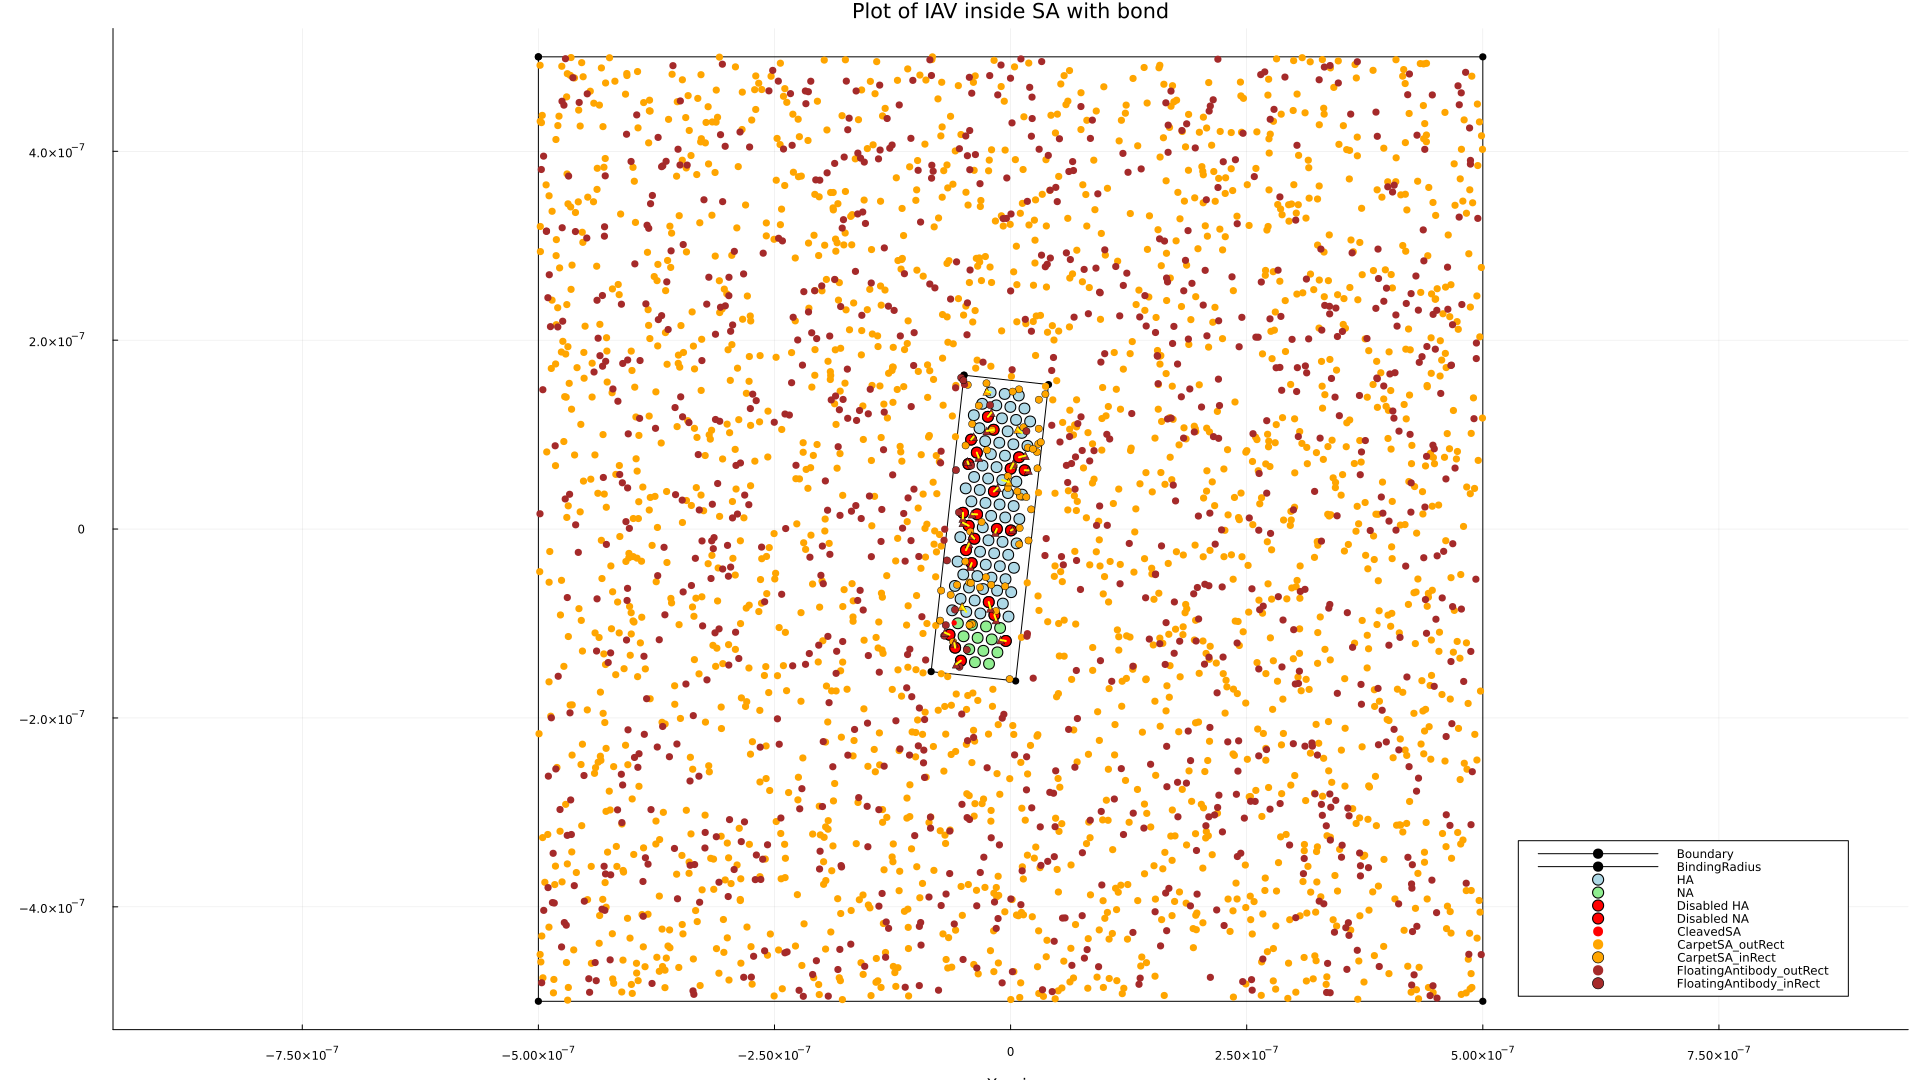

In [9]:
# Save Result ==============================================================
# # Create an animation from the vector of plots
# rm("output", recursive=true)
# mkdir("output")
# index = 1
# for p in ResultPlots
#     savefig(p, "output/" * string(index) * ".png")
#     index = index + 1
# end
display(ResultPlots[size(ResultPlots, 1)])
# savefig(ResultPlots[size(ResultPlots, 1)], "test.png")

# anim = @animate for p in ResultPlots
    # p
# end
# # @gif(ResultPlots), vtk

# # # Save the animation as a GIF
# gif(anim, "result_animation.gif", fps = 4)
# ==========================================================================